## Anna Valentine
### ENGG139.2: Polar Engineering, Polar Hydro
### HW1: Climate Forcing

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
## import csv into pandas dataframe
co2 = pd.read_csv('CO2Data.csv')
temp = pd.read_csv('TempData.csv')

In [7]:
## let's see that the tables were loaded in correctly
temp
co2

,Year,CO2 (ppm)
0,1765,282.049079
1,1766,282.873209
2,1767,283.727919
3,1768,283.781929
4,1769,283.830849
...,...,...
253,2018,408.720000
254,2019,411.660000
255,2020,414.240000
256,2021,416.450000


### Part 1: 
Use the range of warming predicted by the suite of climate models for RCP 4.5 to determine the
range of values for λ (°C m2 W-1). As a point of reference to check your work, Young et al.3 recently
estimated that λ ≈ 0.62 °C m2 W-1.



In [8]:
### This is a point calculation: 
## if we use RCP4.5 and we want to estimate for 2100, 
c_0 = 280 # ppm 
c_45 = 540   # using ppm for 2022 values from spreadsheet
alpha = 5.35 # W / m ^2

### calculate forcing
dF = alpha * np.log(c_45 / c_0)

### change in Temp, RCP4.5
dT_lo = 1.4 # degrees C
dT_hi = 3.3 # degrees C

## calculate range of lambda values
lam_lo = dT_lo / dF
lam_hi = dT_hi / dF

lam_mid = (lam_hi + lam_lo) /2

In [9]:
## these values fit 
print("The range in lambda values will be:", lam_lo, " to ", lam_hi, "[degrees C*m^2 / W]")

The range in lambda values will be: 0.39843239396489954  to  0.9391620714886918 [degrees C*m^2 / W]


### Part 2: 
estimate range of expected range (dT) for each RCP.

In [10]:
## create pandas dataframe for RCP and temp range: 
RCP_dT = pd.DataFrame(columns = ['RCP', 'C (ppm)', 'low T', 'mid T', 'high T'])

RCP_dT['RCP'] = ['8.5', '6.0', 'Roy Spencer', '4.5', '2.6']
RCP_dT['C (ppm)'] = [935, 670,580, 540, 420 ]  # RCP values of C (ppm)

In [11]:
### calculate and fill in values for estiamted temperature
for c in RCP_dT['C (ppm)']:
    RCP_dT['low T'] = lam_lo * alpha * np.log(c / c_0)
    RCP_dT['mid T'] = lam_mid * alpha * np.log(c / c_0)
    RCP_dT['high T'] = lam_hi * alpha * np.log(c / c_0)

In [12]:
### calculate and fill in values for estiamted temperature
for i in range(len(RCP_dT['C (ppm)'])):
    c = RCP_dT['C (ppm)'][i]
    RCP_dT['low T'][i] = lam_lo * alpha * np.log(c / c_0)
    RCP_dT['mid T'][i] = lam_mid * alpha * np.log(c / c_0)
    RCP_dT['high T'][i] = lam_hi * alpha * np.log(c / c_0)

C:\Users\annav\AppData\Local\Temp\ipykernel_29672\2145129264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCP_dT['low T'][i] = lam_lo * alpha * np.log(c / c_0)
C:\Users\annav\AppData\Local\Temp\ipykernel_29672\2145129264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCP_dT['mid T'][i] = lam_mid * alpha * np.log(c / c_0)
C:\Users\annav\AppData\Local\Temp\ipykernel_29672\2145129264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

### Table of RCP Values of estimated temp change

In [13]:
RCP_dT

,RCP,C (ppm),low T,mid T,high T
0,8.5,935,2.570208,4.314277,6.058346
1,6.0,670,1.859807,3.121819,4.383831
2,Roy Spencer,580,1.552323,2.605685,3.659047
3,4.5,540,1.400000,2.350000,3.300000
4,2.6,420,0.864295,1.450781,2.037266


### Part 3: 


In [14]:
### function finds correlation value for given t0
def find_corr(t0):
    ### first index the temp and co2
    temp_idx_start = temp.index[temp['Year'] == (1850 + t0)]
    temp_idx_stop = temp.index[temp['Year'] == (2022)]
    
    co2_idx_start = co2.index[co2['Year'] == (1850)]
    co2_idx_stop = co2.index[co2['Year'] == (2022 - t0)]
    
    ### make our lists to correlate: 
    co2_slice = co2['CO2 (ppm)'][co2_idx_start[0]: co2_idx_stop[0]]
    temp_slice = temp['T (degC)'][temp_idx_start[0]: temp_idx_stop[0]]
    
    ## calculate correlation coefficient:
    corr = np.corrcoef(co2_slice, temp_slice)
    
    return corr[0][1]

In [15]:
# test
find_corr(10)

0.883066020648856

In [16]:
### let's see what the correlation coeff is for many different t0:
corr_df = pd.DataFrame(columns = ['t0', 'corr'])

corr_df['t0'] = np.arange(0, 100, 1)

# cycle through a range of t0
corr_temp = []
for t0 in corr_df['t0']:
    corr_temp.append(find_corr(t0))

corr_df['corr'] = corr_temp

In [17]:
### find the maximum correlation value
print("Max Correlation Coeff: ", corr_df['corr'].max())

t0_max = corr_df['t0'][corr_df[['corr']].idxmax()]
print("t0 of Max:", t0_max)

Max Correlation Coeff:  0.883066020648856
t0 of Max: 10    10
Name: t0, dtype: int32


### Part 4: 
plot lagged delta T over time and compare to obs record: 

In [18]:
# Calculate
delT_10 = alpha*lam_mid*np.log(co2['CO2 (ppm)']/ c_0)

## but now the years are off, so let's fix that: 
df_lag10 = pd.DataFrame(columns = ['Year', 'dT'])

df_lag10['Year'] = co2['Year'] + 10 
df_lag10['dT'] = delT_10

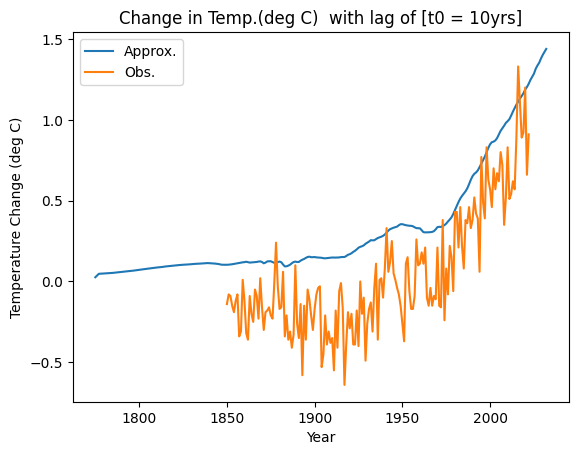

In [20]:
plt.plot(df_lag10['Year'],df_lag10['dT'],  label = 'Approx.')
plt.plot( temp['Year'], temp['T (degC)'], label = 'Obs.')
plt.title("Change in Temp.(deg C)  with lag of [t0 = 10yrs]")
plt.xlabel("Year")
plt.ylabel("Temperature Change (deg C)")
plt.legend()

### Part 5: 
use the lag correlation model to determine the CO2 concentration corresponding to a delT = 2C temp rise: 

In [21]:
### I can re-arrange the equation to become: 
c = c_0* np.exp(2 / (alpha*lam_mid))
print("CO2 for 2 deg C temp rise: ", c, '(ppm)')

CO2 for 2 deg C temp rise:  489.6794095400994 (ppm)


In [22]:
#### Make a table: 
df = pd.DataFrame(columns = ['Model', 'Year (co2= 490 ppm)'])
df['Model'] = ['RCP 8', 'RCP 4.5', 'RCP 6.0', 'Spencer', '2.6']
df['Year (co2= 490 ppm)'] = ['2040', '2051', '2053', '2057', 'n/a']

### Table
table of Model vs. what year it will take to reach co2

In [202]:
df

,Model,Year (co2= 490 ppm)
0,RCP 8,2040
1,RCP 4.5,2051
2,RCP 6.0,2053
3,Spencer,2057
4,2.6,n/a
